In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10366600624980151541, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13489271800512856413
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8030635924202016579
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15877427753684909899
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [2]:
pwd

'/content'

In [3]:
import pandas as pd
from google.colab import files

In [4]:
#import from Kaggle

In [5]:
cd /content

/content


In [6]:
pip install kaggle

In [7]:
files.upload() # create and upload new API token from own account

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"par####","key":"aa#########29"}'}

In [8]:
mkdir -p ~/.kaggle

In [9]:
cp kaggle.json ~/.kaggle/

In [10]:
!chmod 600 ~/.kaggle/kaggle.json 

In [11]:
!kaggle datasets download -d chetankv/dogs-cats-images

dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
#unzip dataset.zip

In [12]:
from zipfile import ZipFile
file_name="dogs-cats-images.zip" 

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')


done


In [21]:
# Part 1 - Transfer Learning: Building the CNN model from the MobileNet 

In [13]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

##Full MobileNet classifier model
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_RES = 224

model = tf.keras.Sequential([
    hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))
])

## Calling Partial MobileNet for Transfer Learning(eliminating the last layer)

In [14]:
URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" # replace feature_vector>classification
IMAGE_RES = 224 # MobileNet needs (224 X 224 x 3)

mobileNet = hub.KerasLayer(URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))


In [62]:
# image_batch = training_set[0]
# image_batch=image_batch[0]
# image_batch

In [63]:
# feature_batch = mobileNet(image_batch)
# print(feature_batch.shape)

(32, 1280)


In [15]:
mobileNet.trainable=False # FREEZING The MobileNet Model Weights and Biases

In [16]:
classifier = tf.keras.Sequential([
  mobileNet,
  layers.Dense(1) # Attaching only the binary classification layer
])

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Part 2 - Data scaling and augmentation

In [39]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
cd dog vs cat/dataset

[Errno 2] No such file or directory: 'dog vs cat/dataset'
/content/dog vs cat/dataset


In [40]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [42]:
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [91]:
history = classifier.fit(training_set,
                         epochs = 15,
                         validation_data = test_set,
                         )

Epoch 1/15
250/250 [==============================] - 107s 428ms/step - loss: 0.1933 - accuracy: 0.9808 - val_loss: 0.1226 - val_accuracy: 0.9880
Epoch 2/15
250/250 [==============================] - 106s 425ms/step - loss: 0.2846 - accuracy: 0.9771 - val_loss: 0.1262 - val_accuracy: 0.9870
Epoch 3/15
250/250 [==============================] - 106s 424ms/step - loss: 0.4861 - accuracy: 0.9605 - val_loss: 0.1102 - val_accuracy: 0.9870
Epoch 4/15
250/250 [==============================] - 106s 424ms/step - loss: 0.3378 - accuracy: 0.9722 - val_loss: 0.1822 - val_accuracy: 0.9855
Epoch 5/15
250/250 [==============================] - 108s 432ms/step - loss: 0.4315 - accuracy: 0.9663 - val_loss: 0.3347 - val_accuracy: 0.9730
Epoch 6/15
250/250 [==============================] - 107s 428ms/step - loss: 0.2399 - accuracy: 0.9808 - val_loss: 0.1019 - val_accuracy: 0.9890
Epoch 7/15
250/250 [==============================] - 106s 426ms/step - loss: 0.2067 - accuracy: 0.9824 - val_loss: 0.2379 -

In [92]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [88]:
import matplotlib.pyplot as plt
import numpy as np

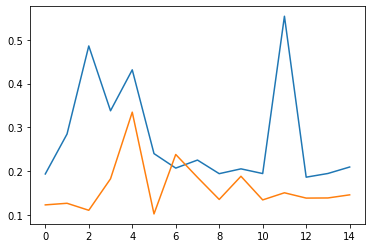

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

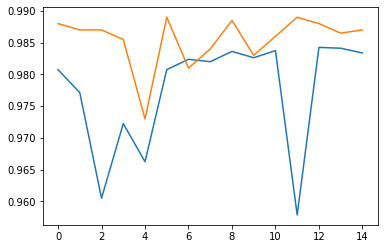

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [95]:
# Using the classifier to predict the first batch

In [76]:
test_set[0][1] # Ground Truth

array([1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.],
      dtype=float32)

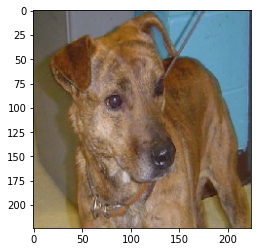

In [96]:
plt.imshow(test_set[0][0][0])

In [97]:
result = classifier.predict(test_set[0][0])
result

array([[ 11.2606735],
       [-11.202828 ],
       [  9.478665 ],
       [ -8.209436 ],
       [  8.559979 ],
       [ -9.082727 ],
       [ -9.837473 ],
       [  9.0789795],
       [-10.249443 ],
       [  4.1574783],
       [ -8.837916 ],
       [ 11.929023 ],
       [  8.993718 ],
       [ 11.379471 ],
       [  9.773003 ],
       [ -8.477352 ],
       [ -9.0436325],
       [ -3.1896703],
       [ -3.1739733],
       [  8.701679 ],
       [ -8.55263  ],
       [ -2.5473597],
       [ -7.158495 ],
       [ 14.074093 ],
       [  5.259785 ],
       [  6.7181244],
       [-10.034994 ],
       [ 10.550572 ],
       [  9.317325 ],
       [ 11.812204 ],
       [  7.0083156],
       [ -5.212366 ]], dtype=float32)

In [99]:
prediction=[1 if i>0 else 0 for i in result  ]

In [100]:
class_names={0:'Cat',1:'Dog'}
predicted_class_names = [class_names[i] for i in prediction]
predicted_class_names

['Dog',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Cat',
 'Cat',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Cat',
 'Dog',
 'Dog',
 'Dog',
 'Dog',
 'Cat']

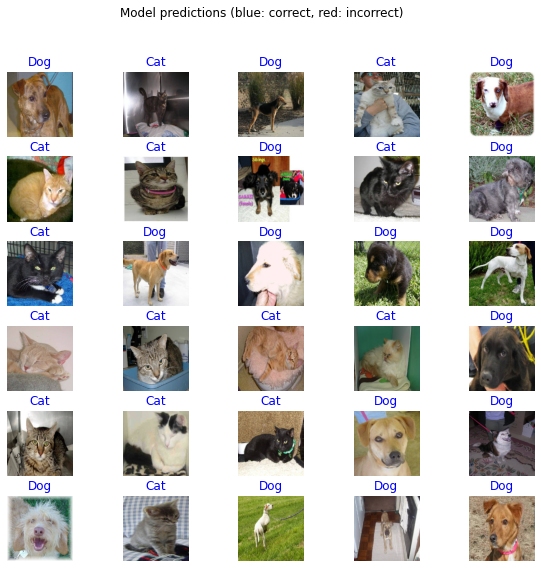

In [101]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(test_set[0][0][n])
  color = "blue" if prediction[n] == test_set[0][1][n] else "red"
  #class_name = "Dog" if predicted_class_names[n] == 'tench' else "Cat"
  plt.title(predicted_class_names[n], color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")